<a href="https://colab.research.google.com/github/naufalfrdss/DeepLearning/blob/main/UAS/Chapter%2019/Training_and_Deploying_at_Scale_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Load & Preprocess Data

Dataset **MNIST** dimuat menggunakan `keras.datasets`, lalu dinormalisasi ke rentang [0, 1]. Dataset dibagi menjadi:

- **Training set**: data utama untuk melatih model
- **Validation set**: untuk memantau performa model selama training
- **Test set**: untuk evaluasi akhir

---

In [1]:
from tensorflow import keras
import numpy as np

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 2. Build & Train the Model

Model dibangun menggunakan `Sequential API` dengan arsitektur:

- `Flatten`: mengubah input 28x28 menjadi 784
- `Dense(300, relu)` dan `Dense(100, relu)`: hidden layers
- `Dense(10, softmax)`: output layer untuk klasifikasi 10 digit (0–9)

Model dikompilasi dengan:
- **Loss**: `sparse_categorical_crossentropy`
- **Optimizer**: `Adam`
- **Metrics**: `accuracy`

Training dilakukan selama beberapa epoch dengan validasi pada data validasi.

---

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(300, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8925 - loss: 0.3625 - val_accuracy: 0.9708 - val_loss: 0.0978
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9716 - loss: 0.0934 - val_accuracy: 0.9662 - val_loss: 0.1037
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9811 - loss: 0.0573 - val_accuracy: 0.9686 - val_loss: 0.1059
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9868 - loss: 0.0428 - val_accuracy: 0.9772 - val_loss: 0.0735
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9906 - loss: 0.0296 - val_accuracy: 0.9796 - val_loss: 0.0702
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9920 - loss: 0.0251 - val_accuracy: 0.9802 - val_loss: 0.0722
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9928 - loss: 0.0213 - val_accuracy: 0.9798 - val_loss: 0.0859
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9933 - loss: 0.

### 3. Visualisasi Akurasi

Akurasi training dan validasi diplot per epoch untuk mengevaluasi apakah terjadi **overfitting** atau **underfitting**.

Visualisasi ini penting untuk memahami dinamika pelatihan model.

---

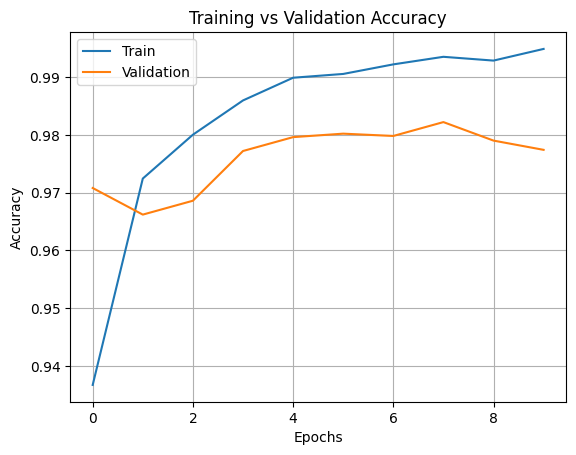

In [3]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()


### 4. Save Model for Deployment

Model disimpan dalam format **SavedModel**, yang merupakan standar TensorFlow untuk menyimpan model dalam produksi.

In [7]:
import os

from google.colab import drive
drive.mount('/content/drive')

drive_base_path = "/content/drive/MyDrive"
model_name = "mnist_model"
model_version = "1"
model_path = os.path.join(drive_base_path, model_name, model_version)

os.makedirs(model_path, exist_ok=True)

model.export(model_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved artifact at '/content/drive/MyDrive/mnist_model/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  134179464548176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134179464549136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134179464548560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134179464548944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134179464549328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134179464546448: TensorSpec(shape=(), dtype=tf.resource, name=None)


### 5. Inference & Visualisasi

Model digunakan untuk memprediksi gambar digit baru dari test set, lalu hasilnya divisualisasikan.

Setiap gambar yang diprediksi akan menampilkan label prediksi di atas citra, memberi gambaran kemampuan model secara intuitif.

---

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


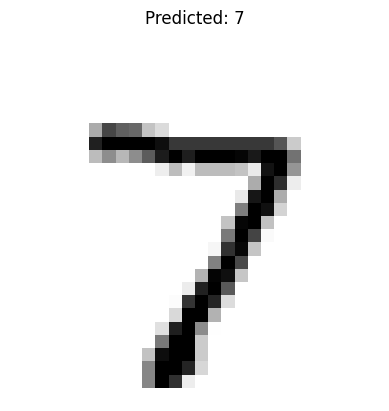

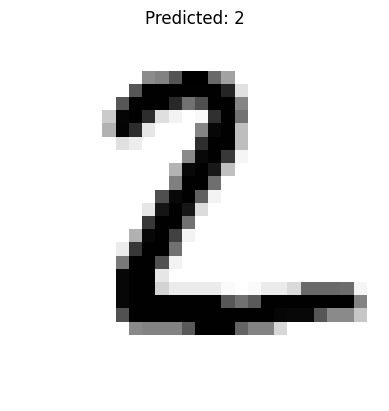

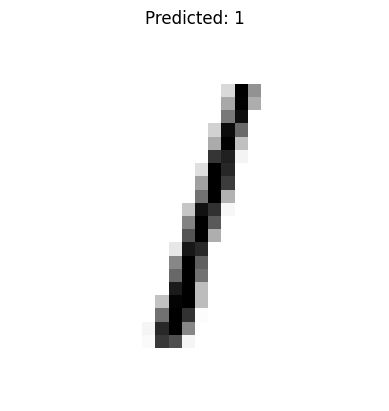

In [8]:
X_new = X_test[:3]
y_pred = np.argmax(model.predict(X_new), axis=-1)

for i in range(3):
    plt.imshow(X_new[i], cmap="binary")
    plt.title(f"Predicted: {y_pred[i]}")
    plt.axis("off")
    plt.show()